In [108]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.model_selection import cross_val_score,cross_val_predict
color = sns.color_palette()
%config IPCompleter.greedy=True
%matplotlib inline

In [89]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

('Train shape : ', (4209, 378))
('Test shape : ', (4209, 377))


In [90]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


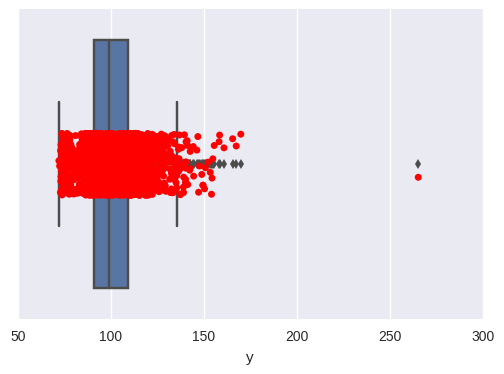

In [91]:
sns.boxplot(train['y'])
sns.stripplot(train['y'], jitter=True,color ='red')

##### Remove outlier

In [92]:
upper_limit = 200
train = train.loc[train['y'] <= 200]

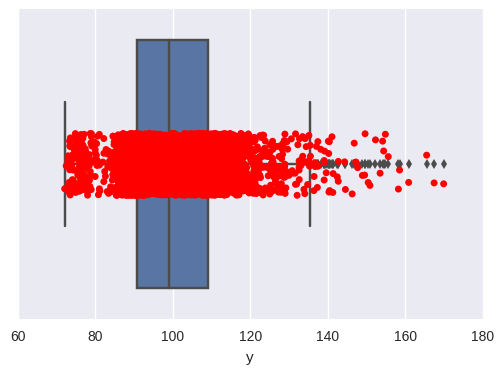

In [93]:
sns.boxplot(train['y'])
sns.stripplot(train['y'], jitter=True,color ='red')

##### 'X0' alone can get a 0.5 score

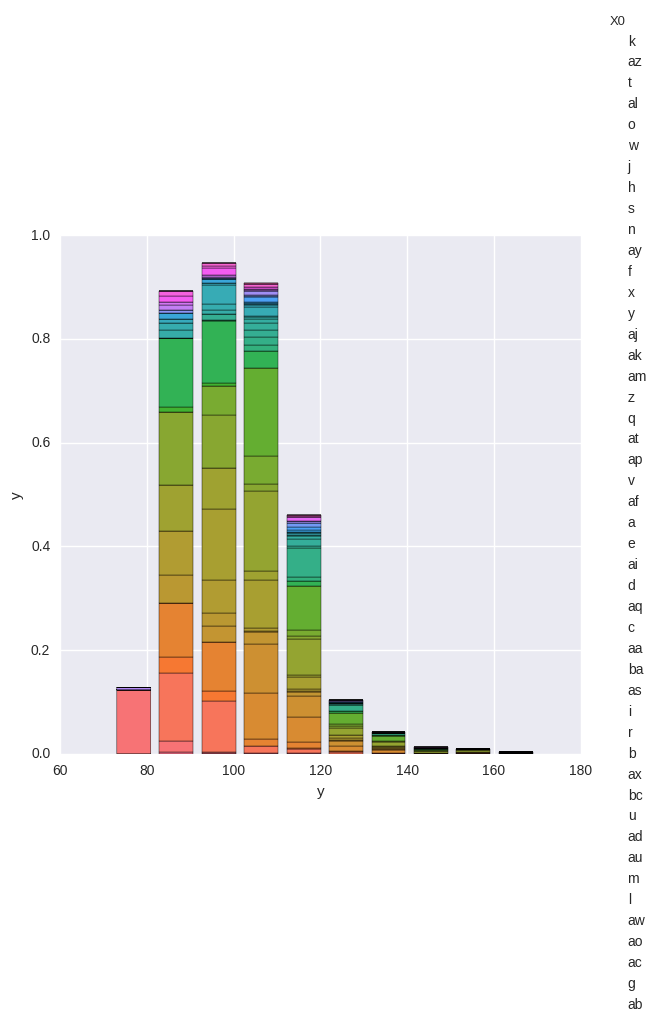

In [26]:
#plt.figure(figsize=(20,20))
sns.pairplot(train[['y','X0']],hue='X0',size =6)

In [27]:
X0_df = train[['y','X0']]

In [28]:
X0_df.head()

,y,X0
0,130.81,k
1,88.53,k
2,76.26,az
3,80.62,az
4,78.02,az


In [30]:
X0_df_sorted = X0_df.sort(columns='X0')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


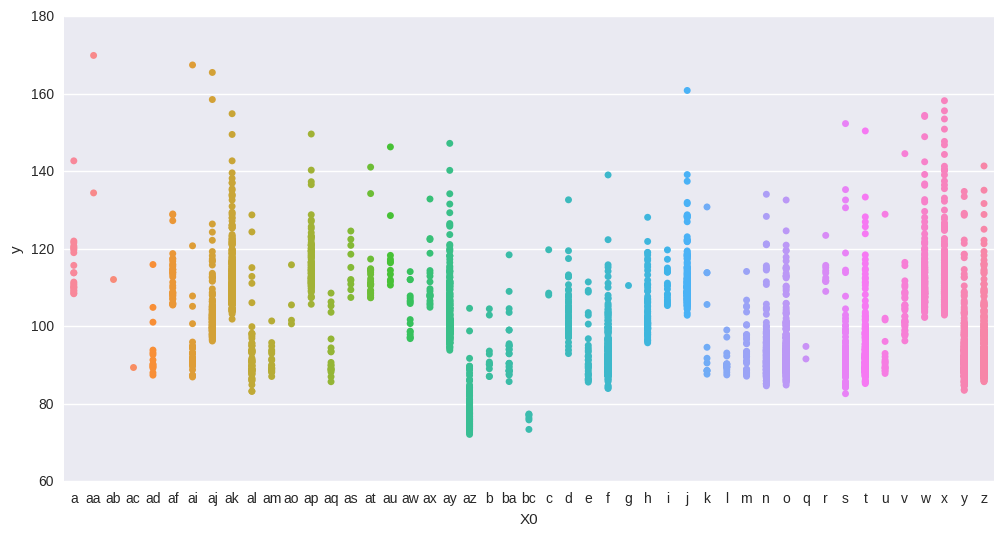

In [44]:
plt.figure(figsize=(12,6))
column_order = np.sort(train['X0'].unique())
sns.stripplot(x='X0',y='y',data=train, order= column_order)


##### Four different distributions

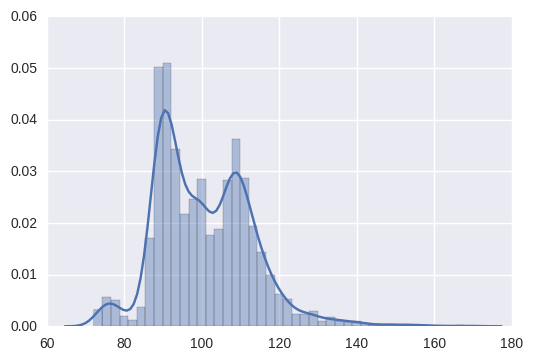

In [46]:
sns.distplot(train['y'].values)

#### So we try to cluster data into 4 clusters.

In [66]:
print X0_df.groupby('X0')['y'].mean()

X0
a     115.630952
aa    152.170000
ab    112.300000
ac     89.620000
ad     94.087857
af    112.791143
ai     95.810588
aj    103.974834
ak    112.552235
al     93.221343
am     91.305556
ao    105.902500
ap    116.577864
aq     93.840556
as    115.349000
at    113.465200
au    118.695455
aw    103.815000
ax    112.152105
ay    103.517029
az     78.025543
b      92.594545
ba     94.151852
bc     76.195000
c     112.133333
d     102.488630
e      93.040312
f      93.926652
g     110.750000
h     104.456133
i     110.597222
j     112.072707
k      99.491818
l      90.923750
m      94.717941
n      93.491333
o      94.618699
q      93.205000
r     113.914000
s      93.866981
t      93.724575
u      94.094706
v     105.195000
w     112.614121
x     112.555333
y      93.514675
z      95.121361
Name: y, dtype: float64


In [67]:
X0_df.head()

,y,X0
0,130.81,k
1,88.53,k
2,76.26,az
3,80.62,az
4,78.02,az


In [74]:
X0_group_means =X0_df.groupby('X0')['y'].mean()[X0_df['X0'].values].values.reshape(-1,1)
print X0_group_means

[[  99.49181818]
 [  99.49181818]
 [  78.02554286]
 ..., 
 [ 112.55223496]
 [  93.22134328]
 [  95.12136111]]


In [77]:
encoding = X0_df.groupby('X0')['y'].mean()
clust = KMeans(4,random_state=0)
labels = clust.fit_predict(X0_group_means)

In [78]:
labels

array([3, 3, 2, ..., 0, 1, 1], dtype=int32)

In [80]:
X0_df['labels'] = labels

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [84]:
X0_df.head()

,y,X0,labels
0,130.81,k,3
1,88.53,k,3
2,76.26,az,2
3,80.62,az,2
4,78.02,az,2


In [85]:
X0_df.groupby('X0')['labels'].median()

X0
a     0
aa    0
ab    0
ac    1
ad    1
af    0
ai    1
aj    3
ak    0
al    1
am    1
ao    3
ap    0
aq    1
as    0
at    0
au    0
aw    3
ax    0
ay    3
az    2
b     1
ba    1
bc    2
c     0
d     3
e     1
f     1
g     0
h     3
i     0
j     0
k     3
l     1
m     1
n     1
o     1
q     1
r     0
s     1
t     1
u     1
v     3
w     0
x     0
y     1
z     1
Name: labels, dtype: int32

In [86]:
X0_df.groupby('X0')['labels'].mean()

X0
a     0
aa    0
ab    0
ac    1
ad    1
af    0
ai    1
aj    3
ak    0
al    1
am    1
ao    3
ap    0
aq    1
as    0
at    0
au    0
aw    3
ax    0
ay    3
az    2
b     1
ba    1
bc    2
c     0
d     3
e     1
f     1
g     0
h     3
i     0
j     0
k     3
l     1
m     1
n     1
o     1
q     1
r     0
s     1
t     1
u     1
v     3
w     0
x     0
y     1
z     1
Name: labels, dtype: int32

In [107]:
X_train = train.drop(['y'],axis = 'columns')
y_train = train['y']
X_test = test
zero_std_cols = X_train.std()[X_train.std() == 0].index
X_train = X_train.drop(zero_std_cols, axis = 'columns')
X_test = X_test.drop(zero_std_cols, axis = 'columns')

In [111]:
y_pred = cross_val_predict( X = X_train.select_dtypes(include = [np.number]), 
                            y = y_train, 
                            estimator = xgb.XGBRegressor(), 
                            cv = 10 )
    

In [112]:
y_pred

array([  97.36448669,   96.24532318,   78.48252869, ...,  112.44791412,
         92.51971436,   96.00536346], dtype=float32)